<center>
<img src="https://storage.googleapis.com/adonaivera_certified/banner.png">
    
##  Diplomado en Ciencia de Datos - Cohorte 2024

Author: [Adonai Vera](https://www.linkedin.com/in/adonai-vera/) & [Jose Bohorquez](https://www.linkedin.com/in/jos%C3%A9-daniel-boh%C3%B3rquez-guerra-5bba281b3/)

## Reglas de Asociación

Netflix, productos que los clientes usualmente compran, y más.
### Introducción

En esta clase, exploraremos el concepto de reglas de asociación en el contexto del análisis de datos. Los algoritmos de reglas de asociación son métodos utilizados en minería de datos para descubrir patrones y relaciones entre diferentes elementos en un conjunto de datos. Estos algoritmos son ampliamente utilizados en diversas aplicaciones, como el análisis de cestas de la compra en tiendas minoristas, la recomendación de productos en línea, la detección de fraudes en transacciones financieras, entre otros.

### Algoritmos de reglas de asociación:

1. Apriori:
Apriori es uno de los algoritmos más conocidos para la generación de conjuntos de ítems frecuentes y la extracción de reglas de asociación. Utiliza un enfoque de búsqueda de fuerza bruta para encontrar todos los conjuntos de ítems frecuentes en un conjunto de datos. El algoritmo Apriori se basa en el principio de que si un conjunto de ítems es frecuente, entonces todos sus subconjuntos también deben ser frecuentes.

Ejemplo:
Supongamos que descubrimos que las personas compran pan, leche y huevos juntos con frecuencia.
Esto significa que es muy probable que también compren pan y leche juntos, o leche y huevos juntos, o solo pan y huevos. En otras palabras, si una combinación grande (pan, leche, huevos) es frecuente, todas las combinaciones más pequeñas que se pueden formar a partir de ella también serán frecuentes.



2. FP-Growth (Frequent Pattern Growth):
FP-Growth es un algoritmo alternativo a Apriori para la generación de conjuntos de ítems frecuentes. Utiliza una estructura de datos de árbol de prefijos (FP-tree) para almacenar información sobre los conjuntos de ítems frecuentes en un conjunto de datos. FP-Growth es especialmente eficiente para conjuntos de datos grandes y dispersos, ya que evita la generación explícita de los conjuntos de ítems candidatos.

3. Eclat:
Eclat es otro algoritmo popular para la extracción de conjuntos de ítems frecuentes. A diferencia de Apriori, que utiliza un enfoque de generación de candidatos, Eclat utiliza un enfoque de búsqueda de patrones verticales. Este enfoque implica la construcción de una matriz vertical que representa la presencia de los ítems en cada transacción, lo que permite una búsqueda más eficiente de los conjuntos de ítems frecuentes.
Lo hace de manera matricial.

4. Algoritmos basados en métodos de optimización:
Además de Apriori, FP-Growth y Eclat, existen otros algoritmos de reglas de asociación que se basan en métodos de optimización, como el algoritmo de alza (Rise), el algoritmo GenMax, entre otros. Estos algoritmos pueden ofrecer eficiencia y rendimiento mejorados en comparación con los enfoques de fuerza bruta.

Estos son solo algunos de los algoritmos más comunes utilizados para la extracción de reglas de asociación. La elección del algoritmo adecuado depende de varios factores, como el tamaño y la densidad del conjunto de datos, los recursos computacionales disponibles y los requisitos de rendimiento del sistema. En general, los algoritmos como Apriori, FP-Growth y Eclat son los más utilizados en la práctica debido a su eficacia y capacidad para manejar conjuntos de datos grandes.

### Definiciones y Conceptos

Antes de comenzar, repasemos algunas definiciones importantes:

- Soporte: El soporte de un conjunto de elementos en un conjunto de datos mide la frecuencia con la que aparece ese conjunto en relación con el número total de transacciones.
- Conjuntos de Ítems Frecuentes: Conjuntos de elementos que tienen un soporte igual o superior al umbral mínimo especificado.
- Reglas de Asociación: Relaciones entre conjuntos de ítems que cumplen ciertos criterios, como el soporte y la confianza.

### Ejemplo 1

#### Generación de Datos
Generaremos un conjunto de datos sintético que simula transacciones de compra en una tienda minorista. Cada fila del DataFrame representa una transacción, donde los productos comprados se almacenan como una lista.

In [35]:
import pandas as pd
import numpy as np

# Generar datos sintéticos de transacciones
np.random.seed(0)
n_transactions = 1000
products = ['Leche', 'Pan', 'Huevos', 'Queso', 'Cerveza', 'Frutas', 'Verduras', 'Galletas', 'Chocolate']
transactions = []
for _ in range(n_transactions):
    transaction = np.random.choice(products, size=np.random.randint(1, len(products)), replace=False)
    transactions.append(transaction)

# Crear DataFrame de transacciones
df_transactions = pd.DataFrame({'Productos': transactions})
print("Primeras 5 transacciones:")
print(df_transactions.head())


Primeras 5 transacciones:
                                           Productos
0        [Galletas, Huevos, Pan, Cerveza, Chocolate]
1   [Queso, Pan, Chocolate, Galletas, Frutas, Leche]
2  [Frutas, Huevos, Queso, Cerveza, Pan, Leche, V...
3                                           [Frutas]
4                [Frutas, Huevos, Galletas, Cerveza]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
df_transactions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Productos
0,"[Galletas, Huevos, Pan, Cerveza, Chocolate]"
1,"[Queso, Pan, Chocolate, Galletas, Frutas, Leche]"
2,"[Frutas, Huevos, Queso, Cerveza, Pan, Leche, V..."
3,[Frutas]
4,"[Frutas, Huevos, Galletas, Cerveza]"
...,...
995,"[Queso, Leche, Chocolate, Huevos, Frutas, Verd..."
996,[Huevos]
997,[Pan]
998,"[Cerveza, Galletas, Chocolate, Leche, Verduras..."


Una vez generados los datos sintéticos de transacciones de compra. Se elige aleatoriamente un número variable de productos de la lista de productos definida y se crea una lista de productos para cada transacción. Luego, estas listas se almacenan en un DataFrame llamado `df_transactions`.

Un poco mas del código:
- Se importan las bibliotecas `pandas` y `numpy`.
- Se establece una semilla aleatoria para reproducibilidad.
- Se define una lista de productos disponibles.
- Se generan las transacciones mediante un bucle que elige aleatoriamente un número variable de productos de la lista y los agrega a la lista de transacciones.
- Se crea un DataFrame `df_transactions` con la lista de transacciones y se imprime la cabeza del DataFrame.


#### Visualización de la distribución

De ahi que, visualizaremos la distribución de las transacciones por el número de productos comprados en cada una. Esto nos dará una idea de cómo están distribuidas las transacciones en términos de su tamaño.

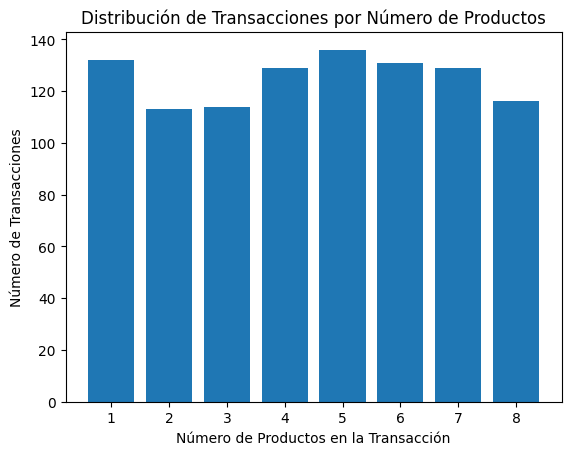

In [ ]:
import matplotlib.pyplot as plt

# Contar la frecuencia de las transacciones por número de productos
transaction_lengths = df_transactions['Productos'].apply(len)
transaction_lengths_counts = transaction_lengths.value_counts().sort_index()

# Visualizar la distribución de transacciones por número de productos
plt.bar(transaction_lengths_counts.index, transaction_lengths_counts.values)
plt.xlabel('Número de Productos en la Transacción')
plt.ylabel('Número de Transacciones')
plt.title('Distribución de Transacciones por Número de Productos')
plt.show()


Esto nos proporciona información sobre la variabilidad en el tamaño de las transacciones.

Y si nos vamos al código:
- Se importa la biblioteca `matplotlib.pyplot` para visualización.
- Se cuentan las frecuencias de los diferentes números de productos en las transacciones.
- Se crea un gráfico de barras que muestra el número de transacciones en función del número de productos en cada una.

#### Aplicación de Apriori
Ahora, convertiremos la lista de productos en una matriz binaria donde las filas representan las transacciones y las columnas representan los productos. Luego, aplicamos el algoritmo Apriori para encontrar conjuntos de ítems frecuentes en la matriz binaria.


In [38]:
basket_sets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Cerveza,Chocolate,Frutas,Galletas,Huevos,Leche,Pan,Queso,Verduras
0,True,True,False,True,True,False,True,False,False
1,False,True,True,True,False,True,True,True,False
2,True,False,True,False,True,True,True,True,True
3,False,False,True,False,False,False,False,False,False
4,True,False,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
995,False,True,True,False,True,True,True,True,True
996,False,False,False,False,True,False,False,False,False
997,False,False,False,False,False,False,True,False,False
998,True,True,False,True,False,True,False,True,True


In [41]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Convertir la lista de productos en una matriz binaria
basket_sets = pd.get_dummies(df_transactions['Productos'].apply(pd.Series).stack()).groupby(level=0).max()

# Generar conjuntos de ítems frecuentes con el algoritmo.
# Min support: Apriori 5% para que se considere frecuente.
frequent_itemsets = apriori(basket_sets, min_support=0.1, use_colnames=True)

# Mostrar los 10 conjuntos de ítems frecuentes más grandes
largest_frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).head(10)
print("Los 10 conjuntos de ítems frecuentes más grandes:")
print(largest_frequent_itemsets)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Los 10 conjuntos de ítems frecuentes más grandes:
    support              itemsets
3     0.513            (Galletas)
4     0.508              (Huevos)
0     0.506             (Cerveza)
8     0.506            (Verduras)
1     0.505           (Chocolate)
2     0.503              (Frutas)
6     0.500                 (Pan)
7     0.500               (Queso)
5     0.472               (Leche)
34    0.309  (Verduras, Galletas)


Support me permite entender el porcetaje del total de transacciones cuantas contiene cada elemento. Por ejemplo, el 51.3 % de las transacciones contiene galletas

Ya con los conjuntos de ítems encontrados, nos vamos al código:

- Se importa la función `apriori` del módulo `mlxtend.frequent_patterns`.
- Se convierte la lista de productos en una matriz binaria utilizando `pd.get_dummies()`. Cada fila de la matriz representa una transacción y cada columna representa un producto.
- Se agrupa la matriz binaria por nivel de índice 0 (transacciones) y se toma el máximo en cada grupo para obtener una única fila por transacción.
- Se aplica el algoritmo Apriori para encontrar conjuntos de ítems frecuentes en la matriz binaria, especificando un umbral de soporte mínimo del 5%.
- Se imprime los 10 conjuntos de ítems frecuentes más grandes encontrados, ordenados por su soporte en orden descendente.


#### Generación de Reglas de Asociación

Con las siguientes lineas generaremos reglas de asociación a partir de los conjuntos de ítems frecuentes encontrados por Apriori y luego filtraremos las reglas basadas en ciertos criterios como la confianza y el soporte.


In [42]:
# Generar reglas de asociación, lift mayor a uno representa una asociación positiva.
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

# Filtrar reglas por confianza y soporte
filtered_rules = rules[(rules['confidence'] > 0.6) & (rules['support'] > 0.1)]

print("Reglas de Asociación filtradas:")
print(filtered_rules)

'''
Antecedentes, consequencias. Chocolate -> Galletas
Lift -> Un valor de 1.185031 significa que es 1.185 veces más probable que Chocolate y Galletas aparezcan juntos de lo que sería por azar.
Leverage -> La diferencia entre la frecuencia observada de la combinación de ítems y la frecuencia esperada si los ítems fueran independientes (-1, 0, 1)
conviction -> 1: Independientes, mayor más relación.
zhangs_metric -> (-1, 0, 1)
'''

Reglas de Asociación filtradas:
                   antecedents  consequents  antecedent support  \
18                 (Chocolate)   (Galletas)               0.505   
28                  (Verduras)  (Chocolate)               0.506   
29                 (Chocolate)   (Verduras)               0.505   
30                    (Frutas)   (Galletas)               0.503   
31                  (Galletas)     (Frutas)               0.513   
...                        ...          ...                 ...   
2314      (Huevos, Queso, Pan)   (Verduras)               0.179   
2315    (Queso, Verduras, Pan)     (Huevos)               0.191   
2327  (Queso, Verduras, Leche)        (Pan)               0.172   
2328       (Queso, Pan, Leche)   (Verduras)               0.165   
2329    (Verduras, Pan, Leche)      (Queso)               0.171   

      consequent support  support  confidence      lift  leverage  conviction  \
18                 0.513    0.307    0.607921  1.185031  0.047935    1.242096   
2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'\nAntecedentes, consequencias. Chocolate -> Galletas\nLift -> Un valor de 1.185031 significa que es 1.185 veces más probable que Chocolate y Galletas aparezcan juntos de lo que sería por azar.\nLeverage -> La diferencia entre la frecuencia observada de la combinación de ítems y la frecuencia esperada si los ítems fueran independientes (-1, 0, 1)\nconviction -> 1: Independientes, mayor más relación.\nzhangs_metric -> (-1, 0, 1)\n'

y del código:

- Se importa la función `association_rules` del módulo `mlxtend.frequent_patterns`.
- Se genera un conjunto de reglas de asociación a partir de los conjuntos de ítems frecuentes encontrados por Apriori, utilizando el criterio de lift mínimo de 1.0.
- Se filtran las reglas por confianza (> 0.6) y soporte (> 0.1) para obtener solo las reglas más fuertes y relevantes.
- Se imprimen las reglas de asociación filtradas.

Este proceso completo nos permite explorar patrones y relaciones interesantes entre los productos en nuestro conjunto de datos de transacciones de compra. Las reglas de asociación encontradas pueden proporcionar información valiosa para la toma de decisiones en negocios, como estrategias de marketing o disposición de productos en tiendas.


``

## Ejemplo 2

Descripción del Proceso:
1. Generación de Datos:
Generaremos un conjunto de datos sintéticos que simula transacciones de compra en una tienda minorista, similar al ejemplo de Apriori.

2. Visualización de la Distribución de Transacciones:
Visualizaremos la distribución de las transacciones por el número de productos comprados en cada una.

3. Aplicación de FP-Growth:
Convertiremos la lista de productos en una matriz binaria y aplicaremos el algoritmo FP-Growth para encontrar conjuntos de ítems frecuentes en el conjunto de datos.

4. Generación de Reglas de Asociación:
Generaremos reglas de asociación a partir de los conjuntos de ítems frecuentes encontrados por FP-Growth.

#### Generación de Datos

Generamos un conjunto de datos sintéticos de transacciones de compra en una tienda minorista. Cada fila del DataFrame representa una transacción, donde los productos comprados se almacenan como una lista.

In [47]:
import pandas as pd
import numpy as np

# Generar datos sintéticos de transacciones
np.random.seed(0)
n_transactions = 1000
products = ['Leche', 'Pan', 'Huevos', 'Queso', 'Cerveza', 'Frutas', 'Verduras', 'Galletas', 'Chocolate']
transactions = []
for _ in range(n_transactions):
    transaction = np.random.choice(products, size=np.random.randint(1, len(products)), replace=False)
    transactions.append(transaction)

# Crear DataFrame de transacciones
df_transactions = pd.DataFrame({'Productos': transactions})
print("Primeras 5 transacciones:")
print(df_transactions.head())


Primeras 5 transacciones:
                                           Productos
0        [Galletas, Huevos, Pan, Cerveza, Chocolate]
1   [Queso, Pan, Chocolate, Galletas, Frutas, Leche]
2  [Frutas, Huevos, Queso, Cerveza, Pan, Leche, V...
3                                           [Frutas]
4                [Frutas, Huevos, Galletas, Cerveza]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Un poco mas de qué se hizo:

- Importamos las bibliotecas `pandas` y `numpy` que son herramientas fundamentales para el manejo y la manipulación de datos en Python.
- Fijamos la semilla aleatoria para garantizar que los resultados sean reproducibles con  `np.random.seed(0)`.
- Definimos una lista de productos disponibles en la tienda.
- Iteramos sobre un rango de transacciones (`n_transactions`) y para cada transacción, elegimos aleatoriamente un número variable de productos de la lista, sin reemplazo. Esto se hace con la función `np.random.choice()`.
- Las transacciones se almacenan en la lista transactions.
- Utilizamos la lista de transacciones generada para crear un DataFrame de pandas llamado `df_transactions`.
- La columna 'Productos' contiene las listas de productos correspondientes a cada transacción.
- Simplemente imprimimos las primeras 5 filas del DataFrame para visualizar cómo se estructuran las transacciones.

#### Visualización de la Distribución de Transacciones

Visualizaremos la distribución de las transacciones por el número de productos comprados en cada una. Esto, proporciona información sobre la variabilidad en el tamaño de las transacciones.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


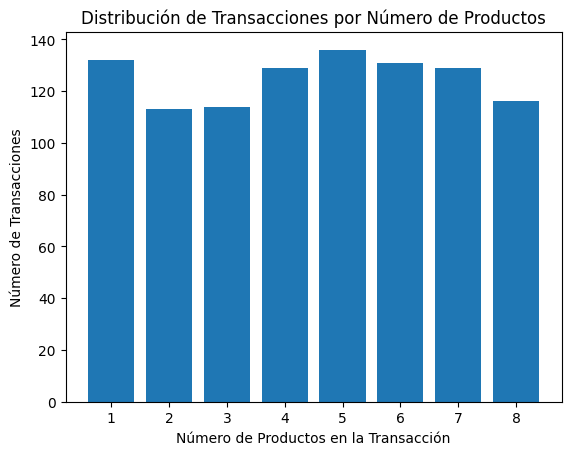

In [48]:
import matplotlib.pyplot as plt

# Contar la frecuencia de las transacciones por número de productos
transaction_lengths = df_transactions['Productos'].apply(len)
transaction_lengths_counts = transaction_lengths.value_counts().sort_index()

# Visualizar la distribución de transacciones por número de productos
plt.bar(transaction_lengths_counts.index, transaction_lengths_counts.values)
plt.xlabel('Número de Productos en la Transacción')
plt.ylabel('Número de Transacciones')
plt.title('Distribución de Transacciones por Número de Productos')
plt.show()


Esto nos proporciona una visualización clara de cómo se distribuyen las transacciones en función del número de productos comprados en cada una, lo que nos permite comprender mejor la estructura de nuestros datos de transacciones.

- Importamos la biblioteca `matplotlib.pyplot`, que nos permitirá crear visualizaciones gráficas de los datos.
- Utilizamos la función `apply()`de pandas para aplicar la función len a cada lista de productos en la columna 'Productos', lo que nos da el número de productos en cada transacción.
- Luego, contamos la frecuencia de cada longitud de transacción utilizando `value_counts()`.
- Ordenamos los resultados por el número de productos en cada transacción `usando sort_index()`.
- Creamos un gráfico de barras utilizando `plt.bar()` donde el eje x representa el número de productos en la transacción y el eje y representa el número de transacciones con esa cantidad de productos.
- Etiquetamos los ejes x e y con 'Número de Productos en la Transacción' y 'Número de Transacciones', respectivamente.
- Añadimos un título al gráfico con 'Distribución de Transacciones por Número de Productos'.
- Mostramos el gráfico utilizando `plt.show()`.


#### Aplicación de FP-Growth

Convertiremos la lista de productos en una matriz binaria, similar al ejemplo de Apriori. Luego, aplicamos el algoritmo FP-Growth para encontrar conjuntos de ítems frecuentes en la matriz binaria.

In [49]:
from mlxtend.frequent_patterns import fpgrowth

# Convertir la lista de productos en una matriz binaria
basket_sets = pd.get_dummies(df_transactions['Productos'].apply(pd.Series).stack()).groupby(level=0).max()

# Generar conjuntos de ítems frecuentes con el algoritmo FP-Growth
frequent_itemsets_fp = fpgrowth(basket_sets, min_support=0.05, use_colnames=True)

# Mostrar los 10 conjuntos de ítems frecuentes más grandes
largest_frequent_itemsets_fp = frequent_itemsets_fp.sort_values(by='support', ascending=False).head(10)
print("Los 10 conjuntos de ítems frecuentes más grandes:")
print(largest_frequent_itemsets_fp)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Los 10 conjuntos de ítems frecuentes más grandes:
     support              itemsets
0      0.513            (Galletas)
1      0.508              (Huevos)
2      0.506             (Cerveza)
8      0.506            (Verduras)
3      0.505           (Chocolate)
5      0.503              (Frutas)
4      0.500                 (Pan)
6      0.500               (Queso)
7      0.472               (Leche)
431    0.309  (Verduras, Galletas)


Explicando el código:

- Importamos la función `fpgrowth` del módulo `mlxtend.frequent_patterns`, que implementa el algoritmo FP-Growth.
- Utilizamos `pd.get_dummies()` para convertir la lista de productos en una matriz binaria, similar al ejemplo de Apriori.
- Después, agrupamos la matriz binaria por nivel de índice 0 (transacciones) y tomamos el máximo en cada grupo para obtener una única fila por transacción.
- Aplicamos el algoritmo FP-Growth utilizando la función `fpgrowth()`.
- Especificamos un umbral de soporte mínimo del 5% con `min_support=0.05`.
- `use_colnames=True` se utiliza para que los nombres de las columnas se utilicen como nombres de los ítems en lugar de los índices de las columnas.
- Ordenamos los conjuntos de ítems frecuentes encontrados por FP-Growth por su soporte en orden descendente.
- Imprimimos los 10 conjuntos de ítems frecuentes más grandes.


####  Generación de Reglas de Asociación

Con todo lo anteior ya realizado, entonces procedemos a usar las reglas de asociación a partir de los conjuntos de ítems frecuentes encontrados por FP-Growth y luego filtramos las reglas basadas en ciertos criterios como la confianza y el soporte.

In [55]:
from mlxtend.frequent_patterns import association_rules

# Generar reglas de asociación
rules_fp = association_rules(frequent_itemsets_fp, metric='lift', min_threshold=1.0)

# Filtrar reglas por confianza y soporte
filtered_rules_fp = rules_fp[(rules_fp['confidence'] > 0.6) & (rules_fp['support'] > 0.1)]

print("Reglas de Asociación filtradas:")
print(filtered_rules_fp)
print(len(filtered_rules_fp))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Reglas de Asociación filtradas:
               antecedents consequents  antecedent support  \
0                 (Huevos)  (Galletas)               0.508   
1               (Galletas)    (Huevos)               0.513   
2                 (Huevos)   (Cerveza)               0.508   
3                (Cerveza)    (Huevos)               0.506   
4               (Galletas)   (Cerveza)               0.513   
...                    ...         ...                 ...   
9336            (Verduras)  (Galletas)               0.506   
9337            (Galletas)  (Verduras)               0.513   
9338    (Huevos, Verduras)  (Galletas)               0.304   
9339    (Huevos, Galletas)  (Verduras)               0.303   
9340  (Verduras, Galletas)    (Huevos)               0.309   

      consequent support  support  confidence      lift  leverage  conviction  \
0                  0.513    0.303    0.596457  1.162684  0.042396    1.206810   
1                  0.508    0.303    0.590643  1.162684  0.04

Que hicimos en estas ultimas lineas:

- Utilizamos la función `association_rules` del módulo `mlxtend.frequent_patterns` para generar un conjunto de reglas de asociación a partir de los conjuntos de ítems frecuentes encontrados por FP-Growth.
- `frequent_itemsets_fp` es el DataFrame que contiene los conjuntos de ítems frecuentes obtenidos previamente con FP-Growth.
`metric='lift'` especifica la métrica a utilizar para medir la calidad de las reglas de asociación. En este caso, estamos utilizando el lift.
- `min_threshold=1.0` establece el umbral mínimo para la métrica especificada. En este caso, estamos configurando el umbral mínimo de lift en 1.0.
- Filtramos las reglas de asociación generadas por `association_rules` utilizando criterios de confianza y soporte.
- En este caso, estamos filtrando las reglas para que tengan una confianza mayor que 0.6 y un soporte mayor que 0.1.
- Finalmente, imprimimos las reglas de asociación filtradas para examinarlas y comprender mejor las relaciones entre los ítems.


#### BUT.... WHAT IF?

Que pasaria si cambiamos las variables de soporte y confianza? si cambiamos esos valores que usamos anteriormente?

In [65]:
# Reducir el umbral de confianza
low_confidence_rules = rules_fp[(rules_fp['confidence'] > 0.8) & (rules_fp['support'] > 0.1)]
print("\nReglas de Asociación con confianza > 0.4:")
print(low_confidence_rules)
print(len(low_confidence_rules))


Reglas de Asociación con confianza > 0.4:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []
0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
# Incrementar el umbral de soporte
high_support_rules = rules_fp[(rules_fp['confidence'] > 0.6) & (rules_fp['support'] > 0.2)]
print("\nReglas de Asociación con soporte > 0.2:")
print(high_support_rules)


Reglas de Asociación con soporte > 0.2:
                antecedents  consequents  antecedent support  \
40              (Chocolate)   (Galletas)               0.505   
46               (Verduras)  (Chocolate)               0.506   
47              (Chocolate)   (Verduras)               0.505   
74      (Huevos, Chocolate)   (Galletas)               0.292   
75       (Huevos, Galletas)  (Chocolate)               0.303   
76    (Chocolate, Galletas)     (Huevos)               0.307   
164   (Verduras, Chocolate)   (Galletas)               0.304   
165    (Verduras, Galletas)  (Chocolate)               0.309   
166   (Chocolate, Galletas)   (Verduras)               0.307   
183                   (Pan)   (Verduras)               0.500   
190        (Pan, Chocolate)   (Galletas)               0.297   
191         (Pan, Galletas)  (Chocolate)               0.299   
192   (Chocolate, Galletas)        (Pan)               0.307   
228         (Verduras, Pan)    (Cerveza)               0.303   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Aquí, agregamos un análisis de sensibilidad para explorar cómo cambian las reglas de asociación al modificar los valores de confianza y soporte.

- Cambio en el umbral de confianza: Si reducimos el umbral de confianza, obtendremos un conjunto más grande de reglas de asociación, ya que se incluirán reglas con una confianza más baja. Esto puede aumentar la cantidad de reglas generadas, pero algunas de ellas pueden ser menos significativas o menos confiables.

- Cambio en el umbral de soporte: Si incrementamos el umbral de soporte, obtendremos un conjunto más pequeño de reglas de asociación, ya que se incluirán solo las reglas basadas en conjuntos de ítems más frecuentes. Esto puede reducir la cantidad de reglas generadas, pero estas reglas tendrán un soporte más alto y, por lo tanto, serán más significativas.

#### !No lo olvides¡

Al ajustar los valores de confianza y soporte, es importante considerar el equilibrio entre la cantidad y la calidad de las reglas generadas, así como la interpretación y aplicabilidad de dichas reglas en el contexto del análisis de datos específico.

## Ejemplo 3

Ya no estamos trabajando con transacciones de una tienda minorista. Ahora, podríamos considerar otro ejemplo como el análisis de interacciones de usuarios en un sitio web. En este caso, vamos tener datos que representan las páginas visitadas por los usuarios durante una sesión en el sitio web. Cada sesión podría ser una transacción y las páginas visitadas podrían ser los ítems.

Entonces, analizaremos los patrones de comportamiento de los usuarios para entender qué páginas suelen ser visitadas juntas, lo cual podría ser útil para la personalización del contenido, la optimización de la navegación del sitio web, entre otros propósitos.


#### Generación de Datos de Interacciones de Usuarios en un Sitio Web  

Generaremos un conjunto de datos sintéticos que representan las interacciones de los usuarios en un sitio web. Cada fila del DataFrame representará una sesión de usuario con las páginas visitadas durante esa sesión. Este conjunto de datos se utilizará en los siguientes bloques de código para realizar análisis y aplicar el algoritmo ECLAT.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configuración de datos sintéticos
np.random.seed(42)  # Para reproducibilidad

# Generación de datos sintéticos
usuarios = ['Usuario_' + str(i) for i in range(1, 101)]  # 100 usuarios
paginas = ['Pagina_' + str(i) for i in range(1, 21)]  # 20 páginas en el sitio web
sesiones_por_usuario = np.random.randint(5, 15, size=len(usuarios))  # Sesiones por usuario entre 5 y 15
data = []

# Generar registros de sesiones de usuarios
for usuario, sesiones in zip(usuarios, sesiones_por_usuario):
    for _ in range(sesiones):
        paginas_visitadas = np.random.choice(paginas, size=np.random.randint(1, 6), replace=False)  # Entre 1 y 5 páginas visitadas por sesión
        data.append([usuario, ','.join(paginas_visitadas)])

# Crear DataFrame
df = pd.DataFrame(data, columns=['Usuario', 'Paginas_visitadas'])




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


revisemos las lineas anteriores:

- Importamos las bibliotecas necesarias para generar y manipular datos, así como para crear visualizaciones. Utilizamos `NumPy` para la generación de números aleatorios, `Pandas` para la manipulación de datos tabulares y `Matplotlib `para la visualización de datos.

- Establecemos una semilla aleatoria utilizando `np.random.seed(42)`. Esto garantiza que los resultados generados sean reproducibles.

- Creamos dos listas: `'usuarios'` y `'paginas'`. La lista usuarios contiene 100 elementos que representan a los usuarios del sitio web (denominados como "Usuario_1", "Usuario_2", ..., "Usuario_100"). La lista paginas contiene 20 elementos que representan las páginas del sitio web (denominadas como "Pagina_1", "Pagina_2", ..., "Pagina_20").

- Generamos un número aleatorio de sesiones para cada usuario utilizando `np.random.randint(5, 15, size=len(usuarios))`. Esto devuelve una matriz de números enteros aleatorios entre 5 y 15 (ambos inclusive) que representa la cantidad de sesiones por usuario.

- Iteramos sobre cada usuario y generamos sesiones de páginas visitadas utilizando un bucle `for `anidado. Para cada usuario, generamos un número aleatorio de sesiones (según la matriz generada anteriormente) y, para cada sesión, seleccionamos de forma aleatoria entre 1 y 5 páginas del sitio web sin reemplazo `(np.random.choice(paginas, size=np.random.randint(1, 6), replace=False))`. Esto simula las páginas visitadas por cada usuario durante cada sesión.

- Almacenamos los datos generados en una lista llamada `data`. Cada elemento de la lista `data` es una lista que contiene el nombre del usuario y las páginas visitadas durante una sesión, separadas por comas.

- Utilizamos el constructor de DataFrame de Pandas `(pd.DataFrame()) `para convertir la lista de datos data en un DataFrame. Especificamos los nombres de las columnas como `'Usuario'` y `'Paginas_visitadas'`.


#### Visualización de los Datos

Este bloque de código nos permitirá visualizar los datos de las interacciones de usuarios en el sitio web, mostrando las páginas visitadas más frecuentemente en un gráfico.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


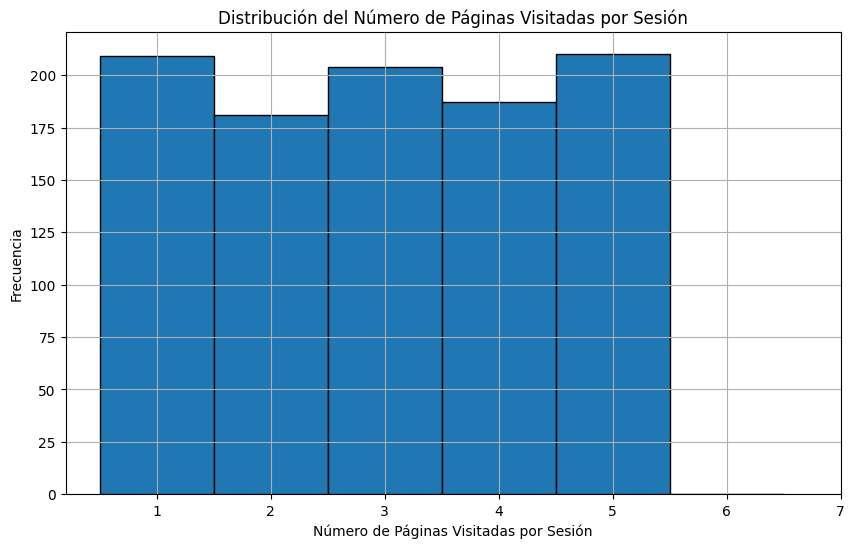

In [23]:

# Visualización de datos

# Contar el número de páginas visitadas por sesión
num_paginas_visitadas = df['Paginas_visitadas'].apply(lambda x: len(x.split(',')))

# Histograma
plt.figure(figsize=(10, 6))
plt.hist(num_paginas_visitadas, bins=range(1, 8), align='left', edgecolor='black')
plt.xlabel('Número de Páginas Visitadas por Sesión')
plt.ylabel('Frecuencia')
plt.title('Distribución del Número de Páginas Visitadas por Sesión')
plt.xticks(range(1, 8))
plt.grid(True)
plt.show()


Aquí calculamos el número de páginas visitadas por sesión y visualiza la distribución de este número mediante un histograma. Veamos el proceso:

- Creamos una nueva serie llamada `num_paginas_visitadas`, que contiene el número de páginas visitadas por sesión. Utilizamos el método `apply()` junto con una función lambda para dividir las páginas visitadas en cada sesión (almacenadas como una cadena separada por comas en la columna `'Paginas_visitadas'`) y luego calcular la longitud de la lista resultante.

- Creamos un histograma para visualizar la distribución del número de páginas visitadas por sesión.

- Utilizamos `plt.hist()` para crear el histograma. Especificamos la serie num_paginas_visitadas como los datos de entrada y definimos los contenedores del histograma utilizando `bins=range(1, 8)` para tener un contenedor por cada número entero del 1 al 7.

- Configuramos la alineación de los bordes de los contenedores utilizando `align='left'` para que los contenedores estén alineados a la izquierda.

- Añadimos bordes a los contenedores utilizando `edgecolor='black'`.

- Etiquetamos los ejes x e y utilizando `plt.xlabel()` y `plt.ylabel() `y añadimos un título al histograma utilizando `plt.title().`

- Configuramos los marcadores en el eje x utilizando `plt.xticks()` para mostrar todos los números enteros del 1 al 7.

- Habilitamos las líneas de la cuadrícula utilizando `plt.grid(True)` y mostramos el histograma utilizando `plt.show()`.


#### Aplicación del Algoritmo Eclat

Encontraremos conjuntos de páginas web frecuentemente visitadas por los usuarios en el sitio web utilizando el algoritmo ECLAT y mostraremos los resultados junto con su parametro de soporte.

Recordemos que el parámetro de soporte en el contexto del algoritmo ECLAT (y en otros algoritmos de minería de patrones frecuentes) es un valor que establece el umbral mínimo de ocurrencia que un conjunto de elementos debe cumplir para considerarse frecuente. En otras palabras, el soporte es la medida de la frecuencia con la que un conjunto de elementos aparece en el conjunto de datos.

In [29]:
from mlxtend.preprocessing import TransactionEncoder

# Convertir las páginas visitadas por cada usuario en listas
interacciones = df['Paginas_visitadas'].apply(lambda x: x.split(',')).tolist()

# Ejecutar ECLAT
te = TransactionEncoder()
te_ary = te.fit(interacciones).transform(interacciones)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

# Step 7: Find frequent itemsets using apriori (simulating ECLAT behavior)
conjuntos_frecuentes = apriori(df_trans, min_support=0.1, use_colnames=True)  # Lower min_support to 0.1


print("Conjuntos de páginas web frecuentemente visitadas:")
print(conjuntos_frecuentes)

Conjuntos de páginas web frecuentemente visitadas:
     support     itemsets
0   0.152371   (Pagina_1)
1   0.143290  (Pagina_10)
2   0.153380  (Pagina_11)
3   0.162462  (Pagina_12)
4   0.162462  (Pagina_13)
5   0.145308  (Pagina_14)
6   0.146317  (Pagina_15)
7   0.153380  (Pagina_16)
8   0.155399  (Pagina_17)
9   0.159435  (Pagina_18)
10  0.135217  (Pagina_19)
11  0.134208   (Pagina_2)
12  0.140262  (Pagina_20)
13  0.147326   (Pagina_3)
14  0.153380   (Pagina_4)
15  0.139253   (Pagina_5)
16  0.153380   (Pagina_6)
17  0.164480   (Pagina_7)
18  0.154390   (Pagina_8)
19  0.152371   (Pagina_9)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Esto nos proporciona información sobre patrones de interacción comunes entre los usuarios del sitio web. Aquí, vemos el codigo que nos ayuda a realizar esto:

- Importamos la función `eclat` del módulo `fim` de la biblioteca `pyfim`. Esta función implementa el algoritmo ECLAT que utilizaremos para encontrar conjuntos de páginas web frecuentemente visitadas.

- Convertimos las páginas visitadas por cada usuario en listas de interacciones utilizando una función `lambda` y `apply()`. Esto separa las páginas visitadas en cada sesión (almacenadas como una cadena separada por comas en la columna `'Paginas_visitadas'`) y las convierte en listas de páginas visitadas.

- Convertimos el resultado en una lista llamada `interacciones`.

- Llamamos a la función `eclat()` con los datos de interacciones y un parámetro `supp=10`. Esto ejecuta el algoritmo ECLAT para encontrar conjuntos de páginas web que aparecen en al menos 10 sesiones de usuario.

- Iteramos sobre los conjuntos de páginas web frecuentemente visitadas (`conjuntos_frecuentes`) y mostramos cada conjunto junto con su soporte (número de sesiones en las que aparece).

##### !Dato Importante¡:

Ajustar el valor del parámetro de soporte afectará la cantidad y la naturaleza de los conjuntos de elementos frecuentes encontrados por el algoritmo ECLAT. Un valor más alto de soporte conducirá a la identificación de conjuntos más específicos y menos frecuentes, mientras que un valor más bajo de soporte permitirá encontrar conjuntos más generales y frecuentes.

En última instancia, la elección del valor de soporte depende de los requisitos específicos del análisis y de la naturaleza de los datos.



#### Visualizar los resultados obtenidos

Visualizar muchas veces nos ayuda identificar de manera efectiva los datos, en este caso, veremos las páginas web más relevantes y frecuentemente visitadas por los usuarios en el sitio web.


In [30]:
conjuntos_frecuentes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.152371,(Pagina_1)
1,0.143290,(Pagina_10)
2,0.153380,(Pagina_11)
3,0.162462,(Pagina_12)
4,0.162462,(Pagina_13)
5,0.145308,(Pagina_14)
6,0.146317,(Pagina_15)
7,0.153380,(Pagina_16)
8,0.155399,(Pagina_17)
9,0.159435,(Pagina_18)


In [32]:
conjuntos_frecuentes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.152371,(Pagina_1)
1,0.143290,(Pagina_10)
2,0.153380,(Pagina_11)
3,0.162462,(Pagina_12)
4,0.162462,(Pagina_13)
5,0.145308,(Pagina_14)
6,0.146317,(Pagina_15)
7,0.153380,(Pagina_16)
8,0.155399,(Pagina_17)
9,0.159435,(Pagina_18)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     support   itemsets
17  0.164480   Pagina_7
3   0.162462  Pagina_12
4   0.162462  Pagina_13
9   0.159435  Pagina_18
8   0.155399  Pagina_17
18  0.154390   Pagina_8
14  0.153380   Pagina_4
2   0.153380  Pagina_11
7   0.153380  Pagina_16
16  0.153380   Pagina_6


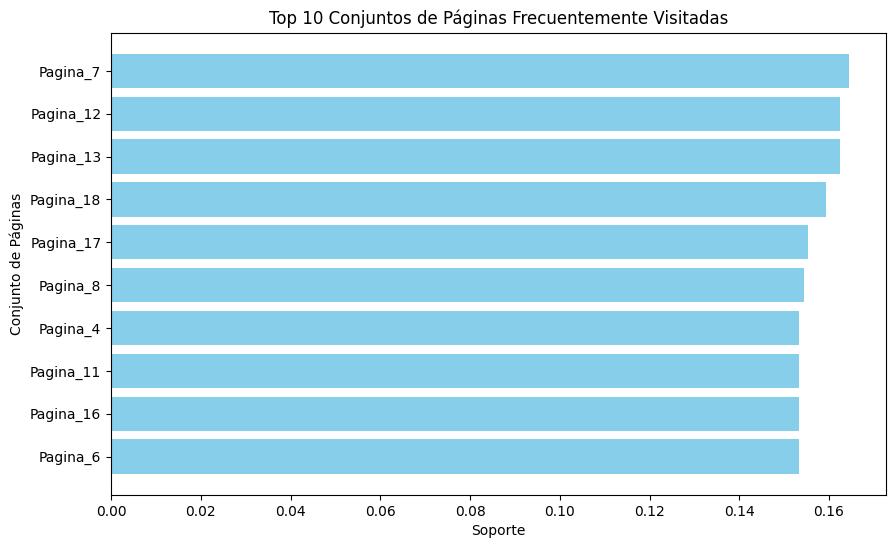

In [33]:
# Convert the frequent itemsets into a DataFrame
frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))

# Sort by support
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

# Get the top 10 frequent itemsets
top_10_resultados = frequent_itemsets.head(10)

# Print the top 10 frequent itemsets
print(top_10_resultados)

# Visualize the top 10 frequent itemsets
plt.figure(figsize=(10, 6))
plt.barh(top_10_resultados['itemsets'], top_10_resultados['support'], color='skyblue')
plt.xlabel('Soporte')
plt.ylabel('Conjunto de Páginas')
plt.title('Top 10 Conjuntos de Páginas Frecuentemente Visitadas')
plt.gca().invert_yaxis()  # Invert y-axis to have the itemset with the highest support on top
plt.show()



Describamos el proceso:

- Creamos un DataFrame llamado `resultados` que contiene los conjuntos de páginas web frecuentemente visitadas junto con su soporte. Utilizamos los resultados obtenidos del algoritmo ECLAT (`conjuntos_frecuentes`) para crear este DataFrame.

- Ordenamos el DataFrame `resultados` por el soporte en orden descendente, de modo que los conjuntos de páginas con mayor soporte aparezcan primero.

- Seleccionamos los 10 primeros conjuntos de páginas más frecuentes utilizando `resultados.head(10)`.

- Imprimimos estos resultados en la consola para tener una visualización rápida de los conjuntos de páginas y sus soportes.

- Creamos un gráfico de barras horizontales para visualizar los 10 primeros conjuntos de páginas más frecuentes.
Utilizamos `plt.barh()` para crear el gráfico de barras. Especificamos los conjuntos de páginas en el eje y y sus soportes en el eje x.

- Configuramos las etiquetas de los ejes x e y y el título del gráfico.

- Invertimos el eje y utilizando `plt.gca().invert_yaxis()` para que el conjunto con el mayor soporte esté en la parte superior del gráfico.

ECLAT, al igual que otros algoritmos de minería de patrones frecuentes, nos ofrece una herramienta poderosa para explorar grandes conjuntos de datos en busca de asociaciones entre elementos.

Una de las ventajas clave de ECLAT es su eficiencia computacional y su capacidad para manejar conjuntos de datos de gran tamaño. Sin embargo, es importante tener en cuenta que el éxito del algoritmo ECLAT depende en gran medida de la calidad y la representatividad de los datos de entrada. Además, la interpretación de los resultados obtenidos por ECLAT requiere un conocimiento profundo del dominio del problema y un análisis cuidadoso para extraer insights significativos.

## Actividad: Análisis de Patrones de Reproducción en un Sitio de Streaming de Música

#### Contexto:
Imagina que eres un analista de datos en un popular sitio de streaming de música y tu tarea es analizar los patrones de reproducción de los usuarios para identificar tendencias y preferencias de escucha.

#### Pregunta de Investigación:
¿Qué canciones suelen reproducirse juntas con mayor frecuencia en el sitio de streaming de música?

#### Datos Sintéticos:
Utilizaremos un conjunto de datos sintéticos que representan las reproducciones de canciones por parte de los usuarios. Cada instancia contendrá una lista de canciones reproducidas por un usuario en una sola sesión de escucha.

In [66]:
# Datos de ejemplo (lista de sesiones de escucha)
listening_sessions = [['cancion1', 'cancion3', 'cancion5'],
                      ['cancion2', 'cancion4', 'cancion6'],
                      ['cancion1', 'cancion2', 'cancion5'],
                      ['cancion1', 'cancion3', 'cancion4'],
                      ['cancion2', 'cancion3', 'cancion4', 'cancion5']]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Preguntas a Resolver:

¿Cuáles son los conjuntos de canciones frecuentes en las sesiones de escucha de los usuarios?
¿Cuáles son las reglas de asociación más fuertes entre las canciones reproducidas?
¿Qué canciones suelen reproducirse juntas con mayor frecuencia?

## Solución

Tenemos que utilizar el algoritmo Apriori para encontrar conjuntos de ítems frecuentes en las sesiones de escucha de los usuarios. Luego, generaremos reglas de asociación basadas en estos conjuntos de ítems y calcularemos medidas como soporte, confianza y lift para identificar las reglas más fuertes. Finalmente, examinaremos los resultados para responder a las preguntas planteadas.


In [68]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,cancion1,cancion2,cancion3,cancion4,cancion5,cancion6
0,True,False,True,False,True,False
1,False,True,False,True,False,True
2,True,True,False,False,True,False
3,True,False,True,True,False,False
4,False,True,True,True,True,False


In [79]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

# Datos de ejemplo (lista de sesiones de escucha)
listening_sessions = [
    ['cancion1'],
    ['cancion1', 'cancion3', 'cancion5'],
    ['cancion2', 'cancion4', 'cancion6'],
    ['cancion1', 'cancion2', 'cancion5'],
    ['cancion1', 'cancion3', 'cancion4'],
    ['cancion2', 'cancion3', 'cancion4', 'cancion5']
    ]

# Convertir las sesiones de escucha en un DataFrame binario
df = pd.get_dummies(pd.DataFrame(listening_sessions).stack()).groupby(level=0).max()

# Obtener conjuntos de canciones frecuentes usando Apriori
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

frequent_itemsets_fp = fpgrowth(df, min_support=0.1, use_colnames=True)

# Mostrar los conjuntos de canciones frecuentes
print("Solucion Pregunta 1 - Conjuntos de canciones frecuentes:")
print(frequent_itemsets)
print("--------------")
print(frequent_itemsets_fp)


Solucion Pregunta 1 - Conjuntos de canciones frecuentes:
     support                                  itemsets
0   0.666667                                (cancion1)
1   0.500000                                (cancion2)
2   0.500000                                (cancion3)
3   0.500000                                (cancion4)
4   0.500000                                (cancion5)
5   0.166667                                (cancion6)
6   0.166667                      (cancion2, cancion1)
7   0.333333                      (cancion1, cancion3)
8   0.166667                      (cancion4, cancion1)
9   0.333333                      (cancion5, cancion1)
10  0.166667                      (cancion2, cancion3)
11  0.333333                      (cancion4, cancion2)
12  0.333333                      (cancion2, cancion5)
13  0.166667                      (cancion2, cancion6)
14  0.333333                      (cancion4, cancion3)
15  0.333333                      (cancion5, cancion3)
16  0.16

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Solución 1:

¿Cuáles son los conjuntos de canciones frecuentes en las sesiones de escucha de los usuarios?

La respuesta a esta pregunta se encuentra en el DataFrame `frequent_itemsets`, donde encontraremos los conjuntos de canciones que cumplen con el umbral mínimo de soporte establecido. Estos conjuntos representan las combinaciones de canciones que se reproducen con frecuencia juntas en las sesiones de escucha de los usuarios.

----

Conviction becomes infinite when the confidence of the rule is equal to 1. This means that whenever the antecedent is present, the consequent is always present as well.

In [82]:
###### Solucion pregunta 2

# Generar reglas de asociación
rules = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=1)

# Ordenar las reglas por lift en orden descendente
rules = rules.sort_values(by='confidence', ascending=False)

# Mostrar las reglas de asociación más fuertes
print("Solucion Pregunta 2 - Reglas de asociación más fuertes:")
print(rules)


Solucion Pregunta 2 - Reglas de asociación más fuertes:
                       antecedents           consequents  antecedent support  \
71                      (cancion6)  (cancion4, cancion2)            0.166667   
51  (cancion2, cancion5, cancion3)            (cancion4)            0.166667   
18            (cancion4, cancion1)            (cancion3)            0.166667   
27            (cancion4, cancion5)            (cancion2)            0.166667   
32            (cancion2, cancion1)            (cancion5)            0.166667   
..                             ...                   ...                 ...   
13                      (cancion3)  (cancion4, cancion5)            0.500000   
45                      (cancion2)  (cancion5, cancion3)            0.500000   
46                      (cancion5)  (cancion2, cancion3)            0.500000   
20                      (cancion4)  (cancion1, cancion3)            0.500000   
47                      (cancion3)  (cancion2, cancion5)        

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Solución 2:

¿Cuáles son las reglas de asociación más fuertes entre las canciones reproducidas?

Las reglas de asociación más fuertes se encuentran en el DataFrame `rules`, que contiene información sobre las reglas generadas a partir de los conjuntos de ítems frecuentes. Cada regla tiene una medida de confianza y lift que nos permite evaluar su fuerza.

In [75]:
###### Solucion pregunta 3
## Filtrar las reglas por una alta confianza y un alto lift
strong_rules = rules[(rules['confidence'] > 0.8) & (rules['lift'] > 1.5)]

# Mostrar las reglas filtradas
print("Solucion Pregunta 3 - Reglas con alta confianza y alto lift:")
print(strong_rules)


Solucion Pregunta 3 - Reglas con alta confianza y alto lift:
                       antecedents           consequents  antecedent support  \
63            (cancion4, cancion5)  (cancion2, cancion3)            0.166667   
66            (cancion2, cancion3)  (cancion4, cancion5)            0.166667   
51                      (cancion6)  (cancion4, cancion2)            0.166667   
58  (cancion5, cancion4, cancion2)            (cancion3)            0.166667   
48            (cancion2, cancion6)            (cancion4)            0.166667   
61  (cancion2, cancion5, cancion3)            (cancion4)            0.166667   
60  (cancion4, cancion5, cancion3)            (cancion2)            0.166667   
59  (cancion4, cancion2, cancion3)            (cancion5)            0.166667   
30            (cancion2, cancion3)            (cancion4)            0.166667   
35            (cancion2, cancion3)            (cancion5)            0.166667   
52            (cancion4, cancion5)            (cancion3)   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Solución 3:

¿Qué canciones suelen reproducirse juntas con mayor frecuencia?

Para responder a esta pregunta, podemos examinar las reglas de asociación generadas y buscar aquellas con una alta confianza y un alto lift. Estas reglas nos indicarán qué canciones tienden a reproducirse juntas con mayor frecuencia y pueden ser útiles para recomendaciones de música personalizadas o campañas de promoción cruzada entre canciones.

In [76]:
## Filtrar las reglas por una alta confianza y un alto lift
strong_rules = rules[(rules['confidence'] > 0.8) & (rules['lift'] > 1.5)]

# Mostrar las reglas filtradas
print("Solucion Pregunta 3 - Reglas con alta confianza y alto lift:")
print(strong_rules)

Solucion Pregunta 3 - Reglas con alta confianza y alto lift:
                       antecedents           consequents  antecedent support  \
63            (cancion4, cancion5)  (cancion2, cancion3)            0.166667   
66            (cancion2, cancion3)  (cancion4, cancion5)            0.166667   
51                      (cancion6)  (cancion4, cancion2)            0.166667   
58  (cancion5, cancion4, cancion2)            (cancion3)            0.166667   
48            (cancion2, cancion6)            (cancion4)            0.166667   
61  (cancion2, cancion5, cancion3)            (cancion4)            0.166667   
60  (cancion4, cancion5, cancion3)            (cancion2)            0.166667   
59  (cancion4, cancion2, cancion3)            (cancion5)            0.166667   
30            (cancion2, cancion3)            (cancion4)            0.166667   
35            (cancion2, cancion3)            (cancion5)            0.166667   
52            (cancion4, cancion5)            (cancion3)   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Algoritmos de Optimización creado por Richard Riveros

In [83]:
# Uso de otros algoritmos
from collections import defaultdict

# Datos de ejemplo (lista de sesiones de escucha)
listening_sessions = [['cancion1', 'cancion3', 'cancion5'],
                    ['cancion2', 'cancion4', 'cancion6'],
                    ['cancion1', 'cancion2', 'cancion5'],
                    ['cancion1', 'cancion3', 'cancion4'],
                    ['cancion2', 'cancion3', 'cancion4', 'cancion5']]

def generate_candidates(itemsets, k):
    candidates = set()
    for i in range(len(itemsets)):
        for j in range(i+1, len(itemsets)):
            s1 = sorted(itemsets[i])
            s2 = sorted(itemsets[j])
            if s1[:k-2] == s2[:k-2] and s1[k-2] < s2[k-2]:
                candidate = tuple(sorted(set(s1) | set(s2)))
                if len(candidate) == k:
                    candidates.add(candidate)
    return candidates

def is_frequent(itemset, sessions, min_support):
    count = sum(1 for session in sessions if set(itemset).issubset(session))
    return count >= min_support

def genmax(sessions, min_support):
    itemsets = [frozenset([item]) for session in sessions for item in session]
    itemsets = list(set(itemsets))
    frequent_itemsets = [itemset for itemset in itemsets if is_frequent(itemset, sessions, min_support)]

    k = 2
    while True:
        candidates = generate_candidates(frequent_itemsets, k)
        frequent_candidates = [c for c in candidates if is_frequent(c, sessions, min_support)]
        if not frequent_candidates:
            break
        frequent_itemsets = [itemset for itemset in frequent_itemsets if not any(set(itemset).issubset(c) for c in frequent_candidates)]
        frequent_itemsets.extend(frequent_candidates)
        k += 1

    return frequent_itemsets

def calculate_support(itemset, sessions):
    return sum(1 for session in sessions if set(itemset).issubset(session)) / len(sessions)

def generate_rules(frequent_itemsets, sessions, min_confidence):
    rules = []
    for itemset in frequent_itemsets:
        if len(itemset) > 1:
            for item in itemset:
                antecedent = frozenset(itemset) - {item}
                consequent = frozenset({item})
                confidence = calculate_support(itemset, sessions) / calculate_support(antecedent, sessions)
                if confidence >= min_confidence:
                    rules.append((antecedent, consequent, confidence))
    return sorted(rules, key=lambda x: x[2], reverse=True)

# Ejecutar el algoritmo GenMax
min_support = 2  # Mínimo soporte
min_confidence = 0.5  # Mínima confianza para las reglas
frequent_itemsets = genmax(listening_sessions, min_support)

# Generar reglas de asociación
strong_rules = generate_rules(frequent_itemsets, listening_sessions, min_confidence)

# 1. ¿Cuáles son los conjuntos de canciones frecuentes en las sesiones de escucha de los usuarios?
print("1. Conjuntos de canciones frecuentes (aparecen juntas en al menos 2 sesiones):")
for itemset in frequent_itemsets:
    if len(itemset) > 1:  # Ignoramos los conjuntos de una sola canción
        print(f"   - {', '.join(itemset)}")

# 2. ¿Cuáles son las reglas de asociación más fuertes entre las canciones reproducidas?
print("\n2. Reglas de asociación más fuertes entre las canciones:")
for antecedent, consequent, confidence in strong_rules[:5]:  # Mostramos las 5 reglas más fuertes
    print(f"   - Si un usuario escucha {', '.join(antecedent)}, hay un {confidence:.2%} de probabilidad de que también escuche {', '.join(consequent)}")

# 3. ¿Qué canciones suelen reproducirse juntas con mayor frecuencia?
print("\n3. Canciones que suelen reproducirse juntas con mayor frecuencia:")
max_length = max(len(itemset) for itemset in frequent_itemsets)
for itemset in frequent_itemsets:
    if len(itemset) == max_length:
        support = calculate_support(itemset, listening_sessions)
        print(f"   - {', '.join(itemset)} (se reproducen juntas en el {support:.2%} de las sesiones)")

1. Conjuntos de canciones frecuentes (aparecen juntas en al menos 2 sesiones):
   - cancion2, cancion4
   - cancion3, cancion4
   - cancion2, cancion5

2. Reglas de asociación más fuertes entre las canciones:
   - Si un usuario escucha cancion4, hay un 66.67% de probabilidad de que también escuche cancion2
   - Si un usuario escucha cancion2, hay un 66.67% de probabilidad de que también escuche cancion4
   - Si un usuario escucha cancion4, hay un 66.67% de probabilidad de que también escuche cancion3
   - Si un usuario escucha cancion3, hay un 66.67% de probabilidad de que también escuche cancion4
   - Si un usuario escucha cancion5, hay un 66.67% de probabilidad de que también escuche cancion2

3. Canciones que suelen reproducirse juntas con mayor frecuencia:
   - cancion2, cancion4 (se reproducen juntas en el 40.00% de las sesiones)
   - cancion3, cancion4 (se reproducen juntas en el 40.00% de las sesiones)
   - cancion2, cancion5 (se reproducen juntas en el 40.00% de las sesiones)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
#Usamos Rise
from collections import defaultdict
from itertools import combinations

# Datos de ejemplo (lista de sesiones de escucha)
listening_sessions = [['cancion1', 'cancion3', 'cancion5'],
                    ['cancion2', 'cancion4', 'cancion6'],
                    ['cancion1', 'cancion2', 'cancion5'],
                    ['cancion1', 'cancion3', 'cancion4'],
                    ['cancion2', 'cancion3', 'cancion4', 'cancion5']]

def generate_rules(itemsets):
    rules = []
    for itemset in itemsets:
        if len(itemset) > 1:
            for item in itemset:
                antecedent = tuple(sorted(set(itemset) - {item}))
                consequent = (item,)
                rules.append((antecedent, consequent))
    return rules

def calculate_support(itemset, sessions):
    count = sum(1 for session in sessions if set(itemset).issubset(session))
    return count / len(sessions)

def calculate_confidence(rule, sessions):
    antecedent, consequent = rule
    union = tuple(sorted(set(antecedent) | set(consequent)))
    support_union = calculate_support(union, sessions)
    support_antecedent = calculate_support(antecedent, sessions)
    return support_union / support_antecedent if support_antecedent > 0 else 0

def rise(sessions, min_support, min_confidence):
    itemsets = []
    for session in sessions:
        for i in range(1, len(session) + 1):
            itemsets.extend(map(frozenset, combinations(session, i)))
    itemsets = list(set(itemsets))

    itemsets_support = {itemset: calculate_support(itemset, sessions) for itemset in itemsets}
    frequent_itemsets = [itemset for itemset, support in itemsets_support.items() if support >= min_support]

    rules = generate_rules(frequent_itemsets)
    strong_rules = [(rule, calculate_confidence(rule, sessions)) for rule in rules]
    strong_rules = [(rule, conf) for rule, conf in strong_rules if conf >= min_confidence]
    strong_rules.sort(key=lambda x: x[1], reverse=True)  # Ordenar por confianza

    return frequent_itemsets, strong_rules

# Ejecutar el algoritmo Rise
min_support = 0.2  # 20% de soporte (aparece en al menos 1 de las 5 sesiones)
min_confidence = 0.5  # 50% de confianza
frequent_itemsets, strong_rules = rise(listening_sessions, min_support, min_confidence)

# 1. ¿Cuáles son los conjuntos de canciones frecuentes en las sesiones de escucha de los usuarios?
print("1. Conjuntos de canciones frecuentes (aparecen juntas en al menos el 20% de las sesiones):")
for itemset in frequent_itemsets:
    if len(itemset) > 1:  # Ignoramos los conjuntos de una sola canción
        support = calculate_support(itemset, listening_sessions)
        print(f"   - {', '.join(itemset)} (soporte: {support:.2%})")

# 2. ¿Cuáles son las reglas de asociación más fuertes entre las canciones reproducidas?
print("\n2. Reglas de asociación más fuertes entre las canciones:")
for (antecedent, consequent), confidence in strong_rules[:5]:  # Mostramos las 5 reglas más fuertes
    print(f"   - Si un usuario escucha {', '.join(antecedent)}, hay un {confidence:.2%} de probabilidad de que también escuche {consequent[0]}")

# 3. ¿Qué canciones suelen reproducirse juntas con mayor frecuencia? (Basado en las reglas)
print("\n3. Canciones que suelen reproducirse juntas con mayor frecuencia (basado en reglas):")
song_pairs = defaultdict(float)
for (antecedent, consequent), confidence in strong_rules:
    if len(antecedent) == 1:
        pair = tuple(sorted(antecedent + consequent))
        song_pairs[pair] = max(song_pairs[pair], confidence)

top_pairs = sorted(song_pairs.items(), key=lambda x: x[1], reverse=True)[:3]  # Top 3 pares
for pair, confidence in top_pairs:
    support = calculate_support(pair, listening_sessions)
    print(f"   - {' y '.join(pair)} (confianza: {confidence:.2%}, soporte: {support:.2%})")

# Bonus: Conjunto más grande de canciones que se reproducen juntas frecuentemente
print("\nBonus: Conjunto más grande de canciones que se reproducen juntas frecuentemente:")
max_size_itemsets = [itemset for itemset in frequent_itemsets if len(itemset) > 2]
if max_size_itemsets:
    max_size = max(len(itemset) for itemset in max_size_itemsets)
    for itemset in max_size_itemsets:
        if len(itemset) == max_size:
            support = calculate_support(itemset, listening_sessions)
            print(f"   - {', '.join(itemset)} (soporte: {support:.2%})")
else:
    print("   No se encontraron conjuntos de más de 2 canciones que se reproduzcan juntas frecuentemente.")

1. Conjuntos de canciones frecuentes (aparecen juntas en al menos el 20% de las sesiones):
   - cancion4, cancion1, cancion3 (soporte: 20.00%)
   - cancion2, cancion6 (soporte: 20.00%)
   - cancion4, cancion2 (soporte: 40.00%)
   - cancion4, cancion1 (soporte: 20.00%)
   - cancion4, cancion2, cancion5 (soporte: 20.00%)
   - cancion4, cancion5 (soporte: 20.00%)
   - cancion2, cancion5, cancion3 (soporte: 20.00%)
   - cancion2, cancion1 (soporte: 20.00%)
   - cancion5, cancion3 (soporte: 40.00%)
   - cancion4, cancion6 (soporte: 20.00%)
   - cancion2, cancion5 (soporte: 40.00%)
   - cancion1, cancion3 (soporte: 40.00%)
   - cancion4, cancion2, cancion6 (soporte: 20.00%)
   - cancion2, cancion5, cancion1 (soporte: 20.00%)
   - cancion5, cancion1 (soporte: 40.00%)
   - cancion2, cancion3 (soporte: 20.00%)
   - cancion5, cancion1, cancion3 (soporte: 20.00%)
   - cancion4, cancion3 (soporte: 40.00%)
   - cancion4, cancion2, cancion3 (soporte: 20.00%)
   - cancion4, cancion2, cancion5, cancio

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
